# SkimLit NLP Project

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f1420032-2478-e218-0570-5cf41fd56237)


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


## Importing and Preprocessing

In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
def get_lines(filename):
  """
  Reads filename (a text filename) and returns the lines of text as a list.

  Args: A string containing the target filepath.

  Returns: A list of string with one string per line from the target filename.
  """
  with open(filename, "r") as f:
    return f.readlines()


In [ ]:
train_lines = get_lines(data_dir+"train.txt")

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_nums(filename):
  """
  Returns a list of dictionaries of abstract line data.

  Takes in filename, read its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences there are in the current abstract, and what
  sentence number the target line is.


  """
  input_lines =get_lines(filename)
  abstract_lines=""
  abstract_samples=[]

  for line in input_lines:
    if line.startswith("###"):
      absrtract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()


      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"]= target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split)-1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
%%time
train_samples = preprocess_text_with_line_nums(data_dir + "train.txt")
val_samples = preprocess_text_with_line_nums(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_nums(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 659 ms, sys: 53.6 ms, total: 712 ms
Wall time: 751 ms


(180040, 30212, 30135)

In [ ]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


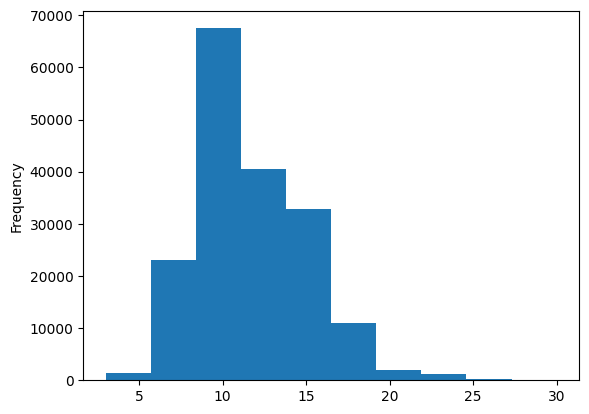

In [ ]:
train_df.total_lines.plot.hist();

In [ ]:
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Making Numeric Labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [ ]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Model 0: Multinomial Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences,
            y = train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-17 17:53:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-17 17:53:35 (104 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(val_labels_encoded,
                                     baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Preparing for Deep Models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]

avg_sent_len = np.mean(sent_lens)

avg_sent_len

26.338269273494777

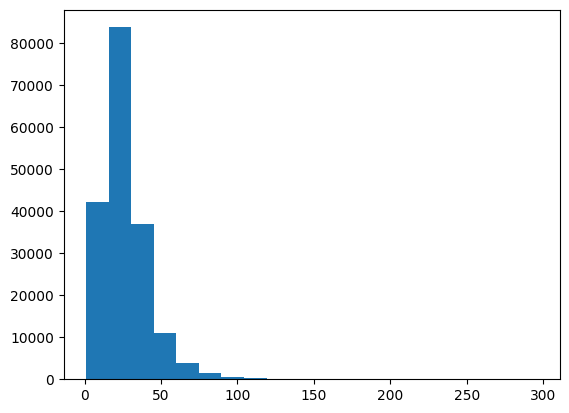

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20);

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
max(sent_lens)

296

In [ ]:
max_vocab = 68000

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens= max_vocab,
                                    output_sequence_length = output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text: {target_sentence}")
print(f"\n Length:{len(target_sentence)}")
print(f"\n Vectorized:{text_vectorizer([target_sentence])}")

Text: eight age and gender matched controls underwent the same protocol on one occasion .

 Length:83

 Vectorized:[[  760   103     3  1005  1383   459   352     2   431   402    18    88
  13110     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Most common words: {rct_20k_text_vocab[:5]}")
print(f"Least common words: {rct_20k_text_vocab[-5:]}")

Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization_2',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                               output_dim = 128,
                               mask_zero=True,
                               name="token_embedding")


In [ ]:
print(f"Sentence before vectorization: \n {target_sentence} \n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization: {vectorized_sentence}")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embed: {embedded_sentence}")

Sentence before vectorization: 
 eight age and gender matched controls underwent the same protocol on one occasion . 

Sentence after vectorization: [[  760   103     3  1005  1383   459   352     2   431   402    18    88
  13110     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
Sentence after embed: [[[ 0.0484784   0.02742631 -0.03470398 ... -0.0187275   0.0130608
   -0.0426477 ]
  [-0.00667356 -0.02800385  0.01569765 ...  0.01870129  0.04394697
    0.01376526]
  [ 0.0400166  -0.01953614 -0.03894777 ...  0.02244842  0.03141768
    0.03164749]
  ...
  [-0.00666404 -0.02955674  0.03954304 ... -0.03317264  0.03340514
    0.00012144]
  [-0.00666404 -0.02955674  0.03954304 ... -0.03317264  0.03340514
    0.00012144]
  [-0.00666404 -0.02955674  0.03954304 ... -0.03317264  0.03340514


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

##Model 1: Conv1D with token Embeddings

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation = "relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
hist_1 = model_1.fit(train_dataset,
                     steps_per_epoch=int(0.1*len(train_dataset)),
                     epochs=3,
                     validation_data= valid_dataset,
                     validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 29s 49ms/step - loss: 0.9169 - accuracy: 0.6353 - val_loss: 0.6900 - val_accuracy: 0.7374
Epoch 2/3
562/562 [==============================] - 7s 13ms/step - loss: 0.6586 - accuracy: 0.7568 - val_loss: 0.6301 - val_accuracy: 0.7663
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6206 - accuracy: 0.7752 - val_loss: 0.5987 - val_accuracy: 0.7816


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.6007 - accuracy: 0.7837


[0.6006625890731812, 0.7836621403694153]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)


945/945 [==============================] - 2s 2ms/step


In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(y_true = val_labels_encoded,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 78.36621210115186,
 'precision': 0.7798988288755215,
 'recall': 0.7836621210115186,
 'f1': 0.7808210403622851}

## Model 2: Feature Extraction with Pretrained Embeddings

In [ ]:
import tensorflow_hub as hub
tf_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                    trainable=False,
                                    name="USE")

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"random sent:\n {random_sentence}")
use_sent = tf_embedding_layer([random_sentence])
print(f"\n sentence after: {use_sent}")

random sent:
 negative factors influencing patients survival , qol , clinical status were males aged > @ years , hypopharyngeal cancer ( stage iii-iv ) , smoking , weight loss > @ % , bmi < @ and disallowance of peg .

 sentence after: [[-2.8366402e-02 -5.2775446e-02 -6.4417653e-02  2.6557921e-02
  -4.5589123e-02 -8.0837898e-02 -5.4937635e-02  6.2268670e-03
   3.3372942e-02  1.5413348e-02  8.1260525e-02 -2.8300055e-03
   5.3992454e-02  4.1663747e-02 -6.5468070e-03  1.8385993e-03
  -8.1556298e-02  6.0507104e-02 -6.4382325e-03  6.1303034e-02
   4.2639356e-02  5.0291453e-02  6.3723207e-02 -1.7700722e-02
   2.4150558e-02  5.6818582e-02 -4.7859531e-02 -2.2134947e-02
  -5.9540132e-03  4.7707070e-02 -1.8739639e-02  8.1532277e-02
   5.2955337e-02 -6.0351603e-02 -7.6047756e-02 -1.6864993e-02
  -6.3338824e-02 -2.6066696e-02  4.8809922e-03 -3.1653065e-03
  -6.6812277e-02  6.1374139e-02  9.5053362e-03 -3.0654447e-02
   4.8343055e-02 -4.5983461e-03  4.4337831e-02 -5.0923087e-02
  -3.2632459e-02  6.

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(5, activation ="softmax")(x)

model_2 = tf.keras.Model(inputs,outputs, name="model_2_use")

model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
hist_2 = model_2.fit(train_dataset,
                     epochs=3,
                     steps_per_epoch = int(0.1*len(train_dataset)),
                     validation_data = valid_dataset,
                     validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 15ms/step - loss: 0.9164 - accuracy: 0.6491 - val_loss: 0.7956 - val_accuracy: 0.6902
Epoch 2/3
562/562 [==============================] - 10s 18ms/step - loss: 0.7677 - accuracy: 0.7003 - val_loss: 0.7538 - val_accuracy: 0.7068
Epoch 3/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7515 - accuracy: 0.7124 - val_loss: 0.7382 - val_accuracy: 0.7144


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 11ms/step - loss: 0.7401 - accuracy: 0.7136


[0.7400771379470825, 0.7136237025260925]

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 10s 11ms/step


array([[0.43176246, 0.3467581 , 0.00188402, 0.21050672, 0.00908865],
       [0.35034978, 0.48267657, 0.00404023, 0.1591251 , 0.00380835],
       [0.22757268, 0.1584218 , 0.01924437, 0.55460113, 0.04016006],
       ...,
       [0.00158958, 0.00550427, 0.06086873, 0.00098122, 0.9310562 ],
       [0.00406467, 0.04379757, 0.23199648, 0.00157698, 0.71856433],
       [0.2012242 , 0.27680728, 0.4626911 , 0.00671629, 0.05256112]],
      dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred = model_2_preds)

In [ ]:
model_2_results

{'accuracy': 71.36237256719184,
 'precision': 0.7142454938867475,
 'recall': 0.7136237256719185,
 'f1': 0.7106982217272885}

## Model 3: Conv1D with Character Embeddings

In [ ]:
train_sentences[:1]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
split_chars(random_sentence)

'n e g a t i v e   f a c t o r s   i n f l u e n c i n g   p a t i e n t s   s u r v i v a l   ,   q o l   ,   c l i n i c a l   s t a t u s   w e r e   m a l e s   a g e d   >   @   y e a r s   ,   h y p o p h a r y n g e a l   c a n c e r   (   s t a g e   i i i - i v   )   ,   s m o k i n g   ,   w e i g h t   l o s s   >   @   %   ,   b m i   <   @   a n d   d i s a l l o w a n c e   o f   p e g   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

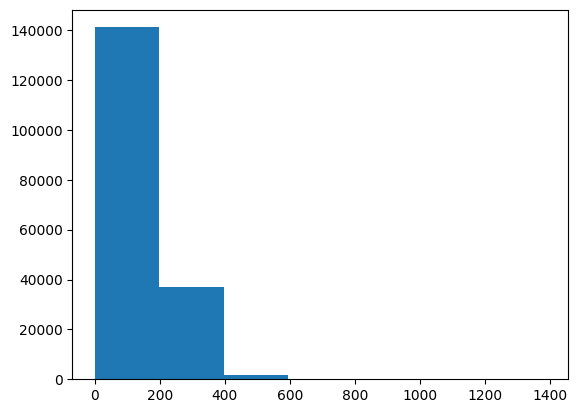

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
output_seq_char_len = int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOV token (out of vocab)
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    name="char_vectorizer")

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"NUmber of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

NUmber of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars = random.choice(train_chars)
print(f"Charified text: \n {random_train_chars}")
print(f"\n Length of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"Vectorized text: \n {vectorized_chars}")
print(f"\n Length of vectorized_chars: {len(vectorized_chars[0])}")


Charified text: 
 i n   t h e   c o n t r o l   g r o u p   ,   t r a z o d o n e   ,   @   m g   ,   o r a l   a d m i n i s t r a t i o n   ,   o n c e   a   d a y   ,   t h e   t r e a t m e n t   o f   @   w e e k s   m a d e   o n e   s e s s i o n   .

 Length of random_train_chars: 95
Vectorized text: 
 [[ 4  6  3 13  2 11  7  6  3  8  7 12 18  8  7 16 14  3  8  5 25  7 10  7
   6  2 15 18  7  8  5 12  5 10 15  4  6  4  9  3  8  5  3  4  7  6  7  6
  11  2  5 10  5 19  3 13  2  3  8  2  5  3 15  2  6  3  7 17 20  2  2 23
   9 15  5 10  2  7  6  2  9  2  9  9  4  7  6  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0

In [ ]:
char_embed = layers.Embedding(input_dim = len(char_vocab),
                               output_dim = 25,
                               mask_zero=True,
                               name="char_embed")

In [ ]:
print(f"Charified text: \n {random_train_chars}")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars: \n {char_embed_example}")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text: 
 i n   t h e   c o n t r o l   g r o u p   ,   t r a z o d o n e   ,   @   m g   ,   o r a l   a d m i n i s t r a t i o n   ,   o n c e   a   d a y   ,   t h e   t r e a t m e n t   o f   @   w e e k s   m a d e   o n e   s e s s i o n   .
Embedded chars: 
 [[[ 0.00974818 -0.0325699  -0.00459323 ...  0.01627115 -0.00908957
   -0.04441651]
  [-0.01197696 -0.01146992 -0.03595529 ... -0.04977465  0.04386063
   -0.03837718]
  [-0.00886822  0.03539116  0.01515547 ...  0.01016656  0.00916106
   -0.01162125]
  ...
  [ 0.03828597  0.04901722  0.04934536 ...  0.04086837  0.02369993
   -0.04824506]
  [ 0.03828597  0.04901722  0.04934536 ...  0.04086837  0.02369993
   -0.04824506]
  [ 0.03828597  0.04901722  0.04934536 ...  0.04086837  0.02369993
   -0.04824506]]]
Character embedding shape: (1, 290, 25)


In [ ]:
inputs = layers.Input(shape=(1,), dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding="same", activation= "relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_char")

model_3.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])




In [ ]:
train_char_datasets = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_datasets = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_datasets = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
hist_3 = model_3.fit(train_char_datasets,
                     epochs = 3,
                     steps_per_epoch = int(0.1*len(train_char_datasets)),
                     validation_data = val_char_datasets,
                     validation_steps=int(0.1*len(val_char_datasets)))

Epoch 1/3
562/562 [==============================] - 5s 7ms/step - loss: 1.2412 - accuracy: 0.5026 - val_loss: 1.0255 - val_accuracy: 0.6017
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9987 - accuracy: 0.6000 - val_loss: 0.9329 - val_accuracy: 0.6310
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9195 - accuracy: 0.6406 - val_loss: 0.8589 - val_accuracy: 0.6679


In [ ]:
model_3_pred_probs = model_3.predict(val_char_datasets)
model_3_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[0.18062603, 0.47539175, 0.03564084, 0.21415183, 0.09418958],
       [0.36397886, 0.3973985 , 0.00677307, 0.19308493, 0.03876458],
       [0.07770885, 0.13151465, 0.18130335, 0.5570147 , 0.05245836],
       ...,
       [0.01800258, 0.034774  , 0.12633552, 0.01526391, 0.80562395],
       [0.00613519, 0.04183642, 0.36704633, 0.01345239, 0.57152975],
       [0.40499344, 0.4675798 , 0.08101439, 0.03913755, 0.00727488]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)

In [ ]:
model_3_results = calculate_results(val_labels_encoded,
                                    model_3_preds)

In [ ]:
model_3_results

{'accuracy': 65.79835826823779,
 'precision': 0.6477156724259663,
 'recall': 0.6579835826823779,
 'f1': 0.6473847183187983}

## Model 4: Combing Pretrained Token Embeddings and Character Embeddings

In [ ]:
token_inputs = layers.Input(shape=[], dtype = tf.string, name="token_input")
token_embeddings = tf_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_output)

char_inputs = layers.Input(shape=(1,), dtype = tf.string, name ="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs,
                            outputs = char_bi_lstm)

token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                 char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = "softmax")(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs= output_layer,
                         name = "model_4_combined")

In [ ]:
model_4.summary()

Model: "model_4_combined"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   ['token_input[0][0

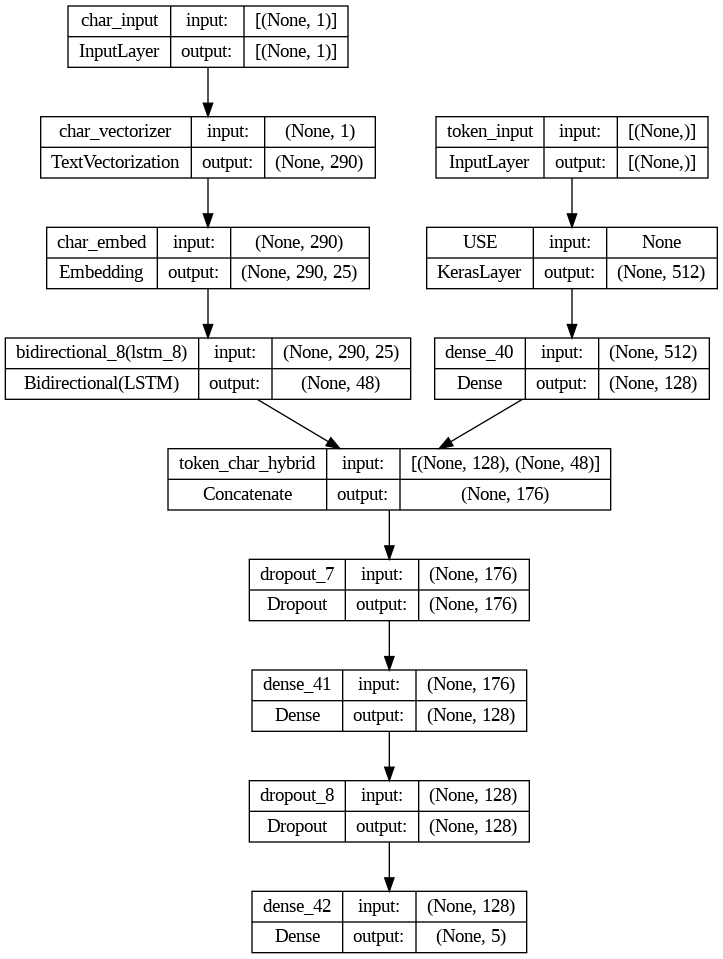

In [ ]:
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data,train_token_char_labels))

train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_data,val_token_char_labels))

val_token_char_dataset = val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_token_char_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_data,test_token_char_labels))

test_token_char_dataset = test_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
hist_4 = model_4.fit(train_token_char_dataset,
                     steps_per_epoch = int(0.1*len(train_token_char_dataset)),
                     epochs=3,
                     validation_data=val_token_char_dataset,
                     validation_steps = int(0.1*len(val_token_char_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 55ms/step - loss: 0.9806 - accuracy: 0.6114 - val_loss: 0.7805 - val_accuracy: 0.7048
Epoch 2/3
562/562 [==============================] - 28s 49ms/step - loss: 0.8016 - accuracy: 0.6908 - val_loss: 0.7139 - val_accuracy: 0.7224
Epoch 3/3
562/562 [==============================] - 24s 43ms/step - loss: 0.7719 - accuracy: 0.7067 - val_loss: 0.6867 - val_accuracy: 0.7394


In [ ]:
model_4.evaluate(val_token_char_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.6925 - accuracy: 0.7353


[0.6924896836280823, 0.73533695936203]

In [ ]:
model_4_pred_probs = model_4.predict(val_token_char_dataset)

945/945 [==============================] - 21s 19ms/step


In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)

In [ ]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)

In [ ]:
model_1_results

{'accuracy': 78.36621210115186,
 'precision': 0.7798988288755215,
 'recall': 0.7836621210115186,
 'f1': 0.7808210403622851}

In [ ]:
model_4_results

{'accuracy': 73.53369522044221,
 'precision': 0.7360829254125651,
 'recall': 0.7353369522044221,
 'f1': 0.7337488920753085}

## Model 5: Taking Model 4 and adding Positional Embeddings

In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

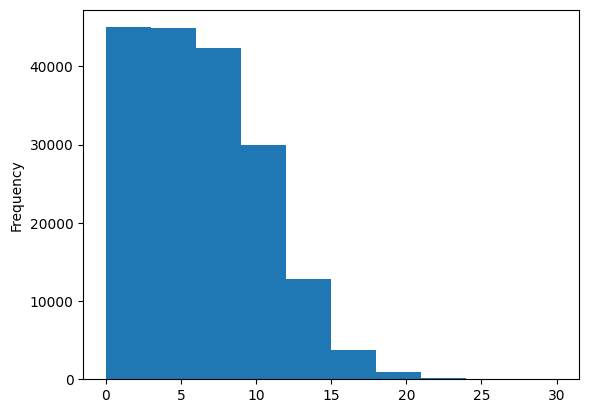

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 15)
train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [ ]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: ylabel='Frequency'>

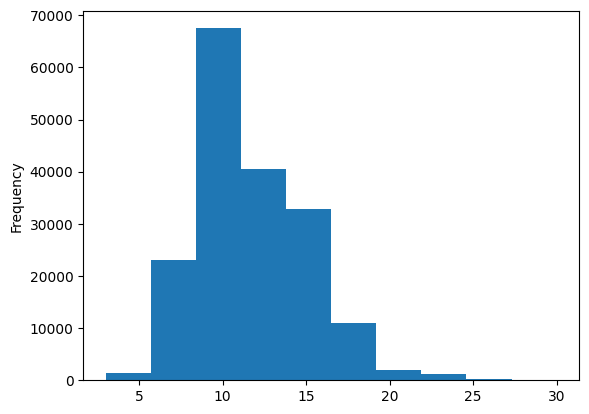

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
np.percentile(train_df.total_lines,98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 20)
val_total_lines_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 20)
test_total_lines_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 20)

In [ ]:
token_inputs = layers.Input(shape=[], dtype = tf.string, name="token_input")
token_embeddings = tf_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_output)


char_inputs = layers.Input(shape=(1,), dtype = tf.string, name ="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs,
                            outputs = char_bi_lstm)

line_number_inputs = layers.Input(shape=(15,), dtype = tf.float32, name = "line_number_input")

x = layers.Dense(32, activation="relu")(line_number_inputs)

line_number_model = tf.keras.Model(inputs= line_number_inputs,
                                   outputs=x)


total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name = "total_lines_input")
y= layers.Dense(32, activation="relu")(total_lines_inputs)

total_line_model = tf.keras.Model(inputs = total_lines_inputs,
                                  outputs = y)

combined_embeddings = layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

tribrid_embeddings = layers.Concatenate(name="char_token_positional")([line_number_model.output,
                                                                       total_line_model.output,
                                                                       z])

output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribrid_embeddings)

model_5 = tf.keras.Model(inputs = [line_number_model.input,
                                   total_line_model.input,
                                   token_model.input,
                                   char_model.input],
                         outputs = output_layer,
                         name="tribrid_embedding_model")

In [ ]:
model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   ['token_inp

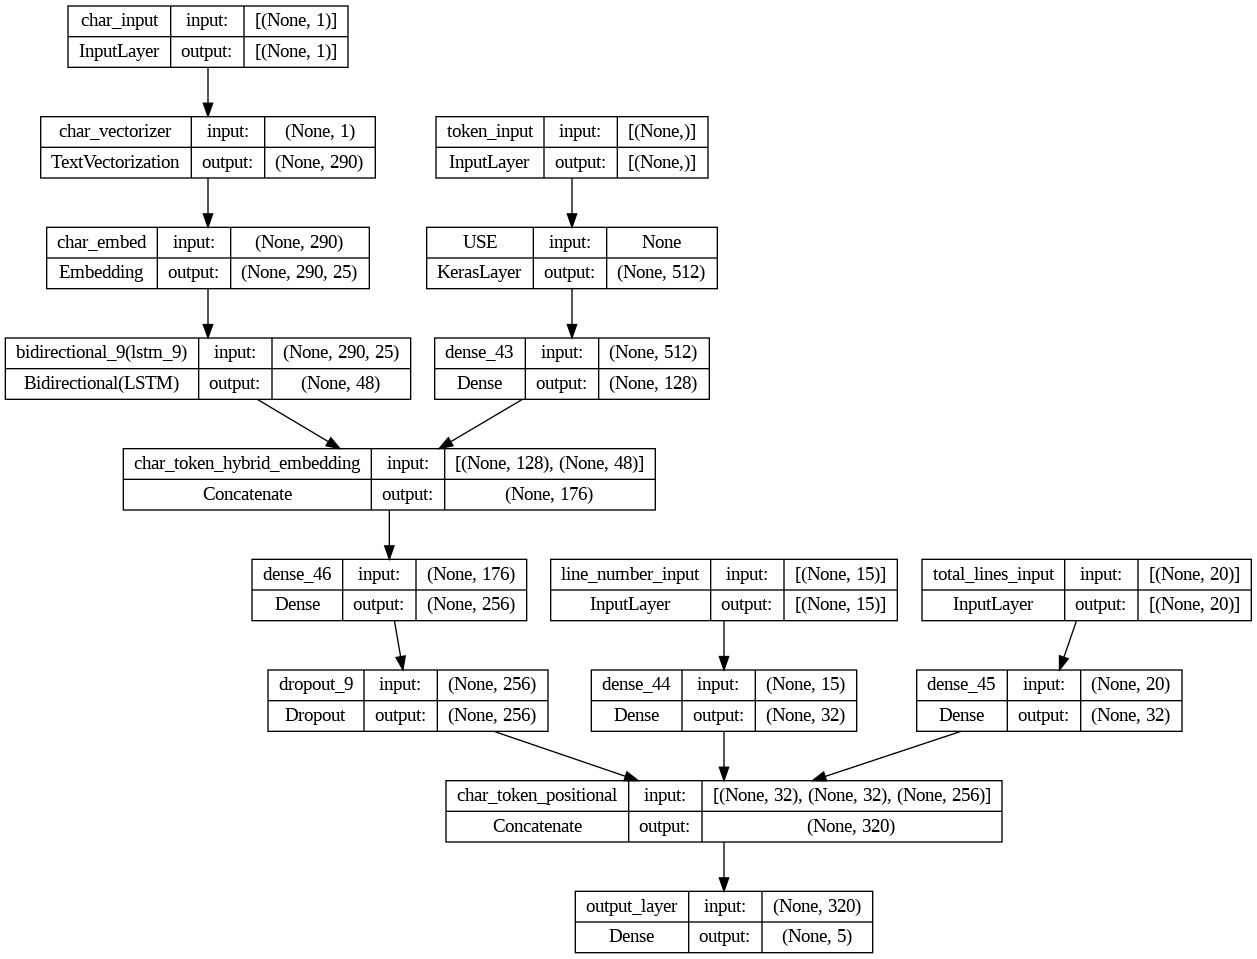

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                                val_total_lines_one_hot,
                                                                val_sentences,
                                                                val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
hist_5 = model_5.fit(train_char_token_pos_dataset,
                     steps_per_epoch = int(0.1*len(train_char_token_pos_dataset)),
                     epochs=3,
                     validation_data = val_char_token_pos_dataset,
                     validation_steps = int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/4
562/562 [==============================] - 43s 59ms/step - loss: 1.0788 - accuracy: 0.7360 - val_loss: 0.9783 - val_accuracy: 0.8059
Epoch 2/4
562/562 [==============================] - 27s 48ms/step - loss: 0.9694 - accuracy: 0.8128 - val_loss: 0.9560 - val_accuracy: 0.8205
Epoch 3/4
562/562 [==============================] - 25s 45ms/step - loss: 0.9584 - accuracy: 0.8147 - val_loss: 0.9492 - val_accuracy: 0.8255
Epoch 4/4
562/562 [==============================] - 33s 59ms/step - loss: 0.9497 - accuracy: 0.8265 - val_loss: 0.9393 - val_accuracy: 0.8305


In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset, verbose=1)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)

945/945 [==============================] - 28s 25ms/step


In [ ]:
model_5_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred=model_5_preds)

In [ ]:
model_5_results

{'accuracy': 82.7055474645836,
 'precision': 0.8313529587143943,
 'recall': 0.8270554746458361,
 'f1': 0.8228808706521807}